# Sleep Disorder Pridiction

### Import the libraries

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score
import warnings
warnings.filterwarnings('ignore')

### Import the dataset using pandas

In [ ]:
data = pd.read_csv("data/Sleep_health_and_lifestyle_dataset.csv")
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Sleep_health_and_lifestyle_dataset.csv'

In [ ]:
data.shape

(374, 13)

In [ ]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


### Handling Missing Values

In [ ]:
data.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

If we observe the above senario we see that the sleep Disorder is showing 219 missing values but they are actually meant for saying there is no disoder 
- So we are going to replace this value with "No Disorder"

In [ ]:
data["Sleep Disorder"] = data["Sleep Disorder"].replace({None: "No Disorder"})
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

### Removing the Person Id column 

as the person id does not contribute to the target Sleep Disorder

In [ ]:
data.drop(['Person ID'],axis=1, inplace= True)
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### Outlier Analysis

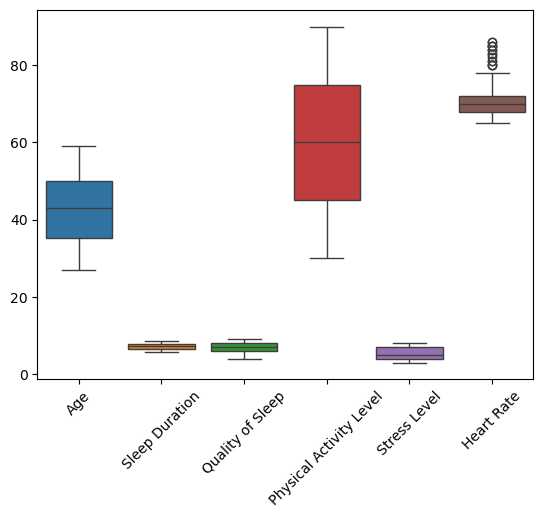

In [ ]:
sns.boxplot(data=data[['Age','Sleep Duration','Quality of Sleep','Physical Activity Level','Stress Level','Heart Rate']])
plt.xticks(rotation=45)
plt.show()

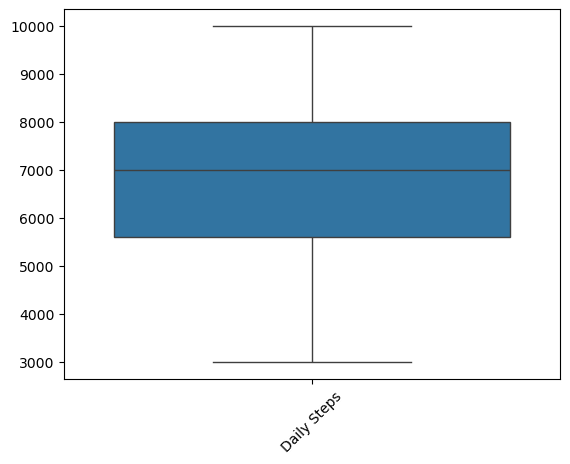

In [ ]:
sns.boxplot(data=data[['Daily Steps']])
plt.xticks(rotation=45)
plt.show()

As from the above we have some values of ouliers from Heart rate but we are keeping them to analise the sleep disorder.

### Encoding all the categorical columns

In [ ]:
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
data["Gender"] = data["Gender"].map({'Male': 0, 'Female':1})
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,0,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
1,0,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
2,0,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,0,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,0,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
data['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [ ]:
data['Occupation'].unique(), data['BMI Category'].unique()

(array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
        'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
        'Salesperson', 'Manager'], dtype=object),
 array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object))

In [ ]:
# As the BMI category is an ordinal data type so we will be using label encoding
bmi_encoder = LabelEncoder()
data['BMI Category'] = bmi_encoder.fit_transform(data['BMI Category'])

# As the Occupation is an nominal data type so we will be using one hot encoding 
one_hot_encoded = pd.get_dummies(data['Occupation'], prefix='Occupation').astype(int)

# Debugging: Check if the columns exist
print("Columns after one-hot encoding:", one_hot_encoded.columns)

#  Combine One-Hot Encoded Columns into a Single Column
data['Combined Occupation'] = one_hot_encoded.apply(lambda row: ''.join(row.astype(str)), axis=1)

# Drop the individual one-hot encoded columns dynamically
data = pd.concat([data, one_hot_encoded], axis=1)  # Add encoded columns back for verification
data = data.drop(columns=one_hot_encoded.columns)

Columns after one-hot encoding: Index(['Occupation_Accountant', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher'],
      dtype='object')


In [ ]:
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Combined Occupation
0,0,27,Software Engineer,6.1,6,42,6,3,126/83,77,4200,No Disorder,00000000010
1,0,28,Doctor,6.2,6,60,8,0,125/80,75,10000,No Disorder,01000000000
2,0,28,Doctor,6.2,6,60,8,0,125/80,75,10000,No Disorder,01000000000
3,0,28,Sales Representative,5.9,4,30,8,2,140/90,85,3000,Sleep Apnea,00000010000
4,0,28,Sales Representative,5.9,4,30,8,2,140/90,85,3000,Sleep Apnea,00000010000


In [ ]:
values = data['Blood Pressure'].unique()

sorted_values = sorted(values, key=lambda x: tuple(map(int, x.split('/'))))

# Output sorted values
print(sorted_values)

['115/75', '115/78', '117/76', '118/75', '118/76', '119/77', '120/80', '121/79', '122/80', '125/80', '125/82', '126/83', '128/84', '128/85', '129/84', '130/85', '130/86', '131/86', '132/87', '135/88', '135/90', '139/91', '140/90', '140/95', '142/92']


In [ ]:
# Now for the blood pressure we will create bins as there are many values

def classify_bp(bp):
    systolic, diastolic = map(int, bp.split('/'))
    if systolic < 90 or diastolic < 60:
        return "Low BP"
    elif (90 <= systolic <= 120) and (60 <= diastolic <= 80):
        return "Normal BP"
    elif 130 <= systolic <= 139 or 80 <= diastolic <= 89:
        return "Stage 1 Hypertension"
    elif systolic > 139 or diastolic > 89:
        return "High BP"
    else:
        return "Elevated BP"

# Apply classification
data['BP Category'] = data['Blood Pressure'].apply(classify_bp)

data.sample(5)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Combined Occupation,BP Category
187,0,43,Salesperson,6.3,6,45,7,3,130/85,72,6000,Insomnia,00000001000,Stage 1 Hypertension
181,0,42,Lawyer,7.8,8,90,5,0,130/85,70,8000,No Disorder,00010000000,Stage 1 Hypertension
109,0,37,Lawyer,7.4,8,60,5,0,130/85,68,8000,No Disorder,00010000000,Stage 1 Hypertension
170,0,41,Lawyer,7.7,8,90,5,0,130/85,70,8000,No Disorder,00010000000,Stage 1 Hypertension
324,1,53,Engineer,8.3,9,30,3,0,125/80,65,5000,No Disorder,00100000000,Stage 1 Hypertension


In [ ]:
data['BP Category'].value_counts()

BP Category
Stage 1 Hypertension    216
Normal BP                86
High BP                  71
Elevated BP               1
Name: count, dtype: int64

In [ ]:
bp_category_mapping = {
    "Low BP": 0,
    "Normal BP": 1,
    "Elevated BP": 2,
    "Stage 1 Hypertension": 3,
    "High BP": 4
}

# Apply label encoding
data['BP Category Encoded'] = data['BP Category'].map(bp_category_mapping)

data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Combined Occupation,BP Category,BP Category Encoded
0,0,27,Software Engineer,6.1,6,42,6,3,126/83,77,4200,No Disorder,00000000010,Stage 1 Hypertension,3
1,0,28,Doctor,6.2,6,60,8,0,125/80,75,10000,No Disorder,01000000000,Stage 1 Hypertension,3
2,0,28,Doctor,6.2,6,60,8,0,125/80,75,10000,No Disorder,01000000000,Stage 1 Hypertension,3
3,0,28,Sales Representative,5.9,4,30,8,2,140/90,85,3000,Sleep Apnea,00000010000,High BP,4
4,0,28,Sales Representative,5.9,4,30,8,2,140/90,85,3000,Sleep Apnea,00000010000,High BP,4


In [ ]:
encoded_df = data.drop(columns=['Occupation', 'Blood Pressure', 'BP Category'], axis = 1)

In [ ]:
encoded_df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Combined Occupation,BP Category Encoded
0,0,27,6.1,6,42,6,3,77,4200,No Disorder,00000000010,3
1,0,28,6.2,6,60,8,0,75,10000,No Disorder,01000000000,3
2,0,28,6.2,6,60,8,0,75,10000,No Disorder,01000000000,3
3,0,28,5.9,4,30,8,2,85,3000,Sleep Apnea,00000010000,4
4,0,28,5.9,4,30,8,2,85,3000,Sleep Apnea,00000010000,4


### Exploratory Data Analysis

#### Univariate Analysis

In [4]:
import math

# Select numeric columns from the dataset
numeric_columns = data.select_dtypes(include='number').columns

# Calculate the number of rows needed based on the number of columns
n_cols = 4
n_rows = math.ceil(len(numeric_columns) / n_cols)

# Set up the subplot grid with 3 columns
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 4))

# Flatten axes in case it's a 2D array
axes = axes.flatten()

# Create a histogram for each numeric column
for i, col in enumerate(numeric_columns):
    sns.histplot(data[col], ax=axes[i], kde=True)  # Plot with KDE curve
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots, if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

NameError: name 'data' is not defined

### Bivariate Analysis

In [5]:
sns.pairplot(data)
plt.show()

NameError: name 'data' is not defined

### Encoding the Sleep Disorder Column values

In [6]:
encoded_df["Sleep Disorder"] = encoded_df["Sleep Disorder"].map({'No Disorder': 0, 'Insomnia':1, 'Sleep Apnea': 2})
encoded_df.head()

NameError: name 'encoded_df' is not defined

In [7]:
sns.pairplot(encoded_df)
plt.show()

NameError: name 'encoded_df' is not defined

### Correlation

In [8]:
from matplotlib.colors import LinearSegmentedColormap

correl = encoded_df.corr()

plt.figure(figsize= (14,4))

# Define a custom single-color colormap
single_color_cmap = LinearSegmentedColormap.from_list("single_color", ["white", "skyblue"])

# Plot the heatmap with the custom colormap
sns.heatmap(correl, cmap=single_color_cmap, annot=True)
plt.show()

NameError: name 'encoded_df' is not defined

NameError: name 'data' is not defined

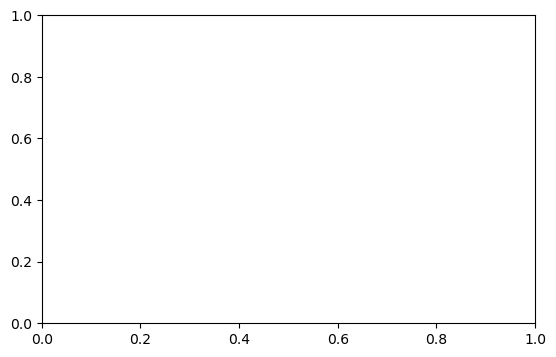

In [9]:
plt.figure(figsize= (14,4))

plt.subplot(1,2,1)
palette_colors = sns.color_palette("Set1")
ax = sns.countplot(data= data, x= 'Sleep Disorder', palette= palette_colors)
plt.xlabel("Sleep Disorder")
plt.ylabel("Count of particular class")
plt.title("Bar Chart distribution")


plt.subplot(1,2,2)
distribution = data['Sleep Disorder'].value_counts()
plt.pie(x=distribution, labels= distribution.index, autopct= '%1.1f%%', startangle=90, colors= sns.color_palette('Set1') )
plt.title("Pie chart distribution in %")
plt.show()

### Standardising the values (Data Normalization)

In [10]:
X = encoded_df.drop('Sleep Disorder', axis=1)
y = encoded_df['Sleep Disorder']
X.head()

NameError: name 'encoded_df' is not defined

In [11]:
y[0:10]

NameError: name 'y' is not defined

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

NameError: name 'X' is not defined

In [13]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

NameError: name 'X_train' is not defined

In [34]:
X_train

array([[0.00000000e+00, 5.16129032e-01, 1.85185185e-01, ...,
        4.28571429e-01, 9.99000000e-08, 6.66666667e-01],
       [0.00000000e+00, 5.16129032e-01, 1.85185185e-01, ...,
        4.28571429e-01, 9.99000000e-08, 6.66666667e-01],
       [0.00000000e+00, 3.22580645e-01, 4.81481481e-01, ...,
        7.14285714e-01, 9.99999900e-04, 6.66666667e-01],
       ...,
       [1.00000000e+00, 6.77419355e-01, 1.11111111e-01, ...,
        1.00000000e+00, 9.99990000e-06, 1.00000000e+00],
       [1.00000000e+00, 9.35483871e-01, 8.88888889e-01, ...,
        5.71428571e-01, 9.99990000e-06, 1.00000000e+00],
       [1.00000000e+00, 2.58064516e-01, 5.18518519e-01, ...,
        5.71428571e-01, 0.00000000e+00, 0.00000000e+00]])

In [36]:
X.columns


Index(['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Combined Occupation', 'BP Category Encoded'],
      dtype='object')

In [37]:
X_train = pd.DataFrame(data = X_train, columns=['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Combined Occupation', 'BP Category Encoded'])

In [38]:
X_train.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Combined Occupation,BP Category Encoded
0,0.0,0.516129,0.185185,0.4,0.25,0.8,1.0,0.333333,0.428571,9.990000e-08,0.666667
1,0.0,0.516129,0.185185,0.4,0.25,0.8,1.0,0.333333,0.428571,9.990000e-08,0.666667
2,0.0,0.322581,0.481481,0.8,0.50,0.4,0.0,0.142857,0.714286,9.999999e-04,0.666667
3,0.0,0.032258,0.074074,0.4,0.00,1.0,0.0,0.238095,0.714286,1.000000e-01,0.000000
4,0.0,0.516129,0.185185,0.4,0.25,0.8,1.0,0.333333,0.428571,9.990000e-08,0.666667


In [39]:
X_test = pd.DataFrame(data = X_test, columns=['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Combined Occupation', 'BP Category Encoded'])

## Model Development

### Decision Tree Classifier

In [43]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train,y_train)
y_pred_DT = model_DT.predict(X_test)

In [44]:
# Decision Tree Evaluation
accuracy_DT = accuracy_score(y_test, y_pred_DT)

# Weighted precision and recall (due to class imbalance)
precision_DT = precision_score(y_test, y_pred_DT, average='weighted')
recall_DT = recall_score(y_test, y_pred_DT, average='weighted')

# Class-wise precision and recall
precision_DT_class = precision_score(y_test, y_pred_DT, average=None)  
recall_DT_class = recall_score(y_test, y_pred_DT, average=None)

f1_DT = f1_score(y_test, y_pred_DT, average= 'weighted')
confusion_DT = confusion_matrix(y_test, y_pred_DT)
classi_DT = classification_report(y_test, y_pred_DT)

# Print weighted metrics
print(f"The Accuracy score for Decision Tree Classifier is {accuracy_DT:.2f}")
print(f"The Weighted Precision score for Decision Tree Classifier is {precision_DT:.2f}")
print(f"The Weighted Recall score for Decision Tree Classifier is {recall_DT:.2f}")

# Print confusion matrix, classification report and f1_score
print(f"The F1 score for Decision Tree Classifier is {f1_DT:.4f}")
print(f"The Confusion Matrix for Decision Tree Classifier is \n{confusion_DT}")
print(f"The Classification Report for Decision Tree Classifier is \n{classi_DT}")

# Print class-wise precision and recall
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_DT_class[idx]:.2f}, Recall: {recall_DT_class[idx]:.2f}")

The Accuracy score for Decision Tree Classifier is 0.89
The Weighted Precision score for Decision Tree Classifier is 0.89
The Weighted Recall score for Decision Tree Classifier is 0.89
The F1 score for Decision Tree Classifier is 0.8911
The Confusion Matrix for Decision Tree Classifier is 
[[54  1  0]
 [ 1 14  2]
 [ 3  3 16]]
The Classification Report for Decision Tree Classifier is 
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.78      0.82      0.80        17
           2       0.89      0.73      0.80        22

    accuracy                           0.89        94
   macro avg       0.87      0.84      0.85        94
weighted avg       0.89      0.89      0.89        94


Class-wise Precision and Recall:
Class 0 - Precision: 0.93, Recall: 0.98
Class 1 - Precision: 0.78, Recall: 0.82
Class 2 - Precision: 0.89, Recall: 0.73


### Random Forest Classifier

In [45]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train,y_train)
y_pred_RF = model_DT.predict(X_test)

In [46]:
# Random Forest Evaluation
accuracy_RF = accuracy_score(y_test, y_pred_RF)

# Weighted precision and recall (due to class imbalance)
precision_RF = precision_score(y_test, y_pred_RF, average='weighted')
recall_RF = recall_score(y_test, y_pred_RF, average='weighted')

# Class-wise precision and recall
precision_RF_class = precision_score(y_test, y_pred_RF, average=None)  
recall_RF_class = recall_score(y_test, y_pred_RF, average=None)

f1_RF = f1_score(y_test, y_pred_RF, average='weighted')
confusion_RF = confusion_matrix(y_test, y_pred_RF)
classi_RF = classification_report(y_test, y_pred_RF)

# Print weighted metrics
print(f"The Accuracy score for Random Forest Classifier is {accuracy_RF:.2f}")
print(f"The Weighted Precision score for Random Forest Classifier is {precision_RF:.2f}")
print(f"The Weighted Recall score for Random Forest Classifier is {recall_RF:.2f}")

# Print f1_score, confusion matrix and classification report
print(f"The F1 score for Random Forest Classifier is {f1_RF:.4f}")
print(f"The Confusion Matrix for Random Forest Classifier is \n{confusion_RF}")
print(f"The Classification Report for Random Forest Classifier is \n{classi_RF}")

# Print class-wise precision and recall
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_RF_class[idx]:.2f}, Recall: {recall_RF_class[idx]:.2f}")

The Accuracy score for Random Forest Classifier is 0.89
The Weighted Precision score for Random Forest Classifier is 0.89
The Weighted Recall score for Random Forest Classifier is 0.89
The F1 score for Random Forest Classifier is 0.8911
The Confusion Matrix for Random Forest Classifier is 
[[54  1  0]
 [ 1 14  2]
 [ 3  3 16]]
The Classification Report for Random Forest Classifier is 
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.78      0.82      0.80        17
           2       0.89      0.73      0.80        22

    accuracy                           0.89        94
   macro avg       0.87      0.84      0.85        94
weighted avg       0.89      0.89      0.89        94


Class-wise Precision and Recall:
Class 0 - Precision: 0.93, Recall: 0.98
Class 1 - Precision: 0.78, Recall: 0.82
Class 2 - Precision: 0.89, Recall: 0.73


### K Nearest Neighbours Classifier

In [47]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

In [48]:
# KNN Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Weighted precision and recall for overall performance (handles class imbalance)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')

# Class-wise precision and recall
precision_knn_class = precision_score(y_test, y_pred_knn, average=None)
recall_knn_class = recall_score(y_test, y_pred_knn, average=None)

f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
confusion_knn = confusion_matrix(y_test, y_pred_knn)
classi_knn = classification_report(y_test, y_pred_knn)

# Print weighted metrics
print(f"The Accuracy score for K Nearest Neighbours Classifier is {accuracy_knn:.2f}")
print(f"The Weighted Precision score for K Nearest Neighbours Classifier is {precision_knn:.2f}")
print(f"The Weighted Recall score for K Nearest Neighbours Classifier is {recall_knn:.2f}")

# Print f1_score, confusion matrix and classification report
print(f"The F1 score for K Nearest Neighbours Classifier is {f1_knn:.4f}")
print(f"The Confusion Matrix for K Nearest Neighbours Classifier is \n{confusion_knn}")
print(f"The Classification Report for K Nearest Neighbours Classifier is \n{classi_knn}")

# Print class-wise precision and recall
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_knn_class[idx]:.2f}, Recall: {recall_knn_class[idx]:.2f}")

The Accuracy score for K Nearest Neighbours Classifier is 0.88
The Weighted Precision score for K Nearest Neighbours Classifier is 0.89
The Weighted Recall score for K Nearest Neighbours Classifier is 0.88
The F1 score for K Nearest Neighbours Classifier is 0.8803
The Confusion Matrix for K Nearest Neighbours Classifier is 
[[53  2  0]
 [ 1 15  1]
 [ 4  3 15]]
The Classification Report for K Nearest Neighbours Classifier is 
              precision    recall  f1-score   support

           0       0.91      0.96      0.94        55
           1       0.75      0.88      0.81        17
           2       0.94      0.68      0.79        22

    accuracy                           0.88        94
   macro avg       0.87      0.84      0.85        94
weighted avg       0.89      0.88      0.88        94


Class-wise Precision and Recall:
Class 0 - Precision: 0.91, Recall: 0.96
Class 1 - Precision: 0.75, Recall: 0.88
Class 2 - Precision: 0.94, Recall: 0.68


### Support Vector Machine Classifier

In [49]:
model_svc = SVC(kernel='linear')
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)

In [50]:
# SVC Evaluation
accuracy_svc = accuracy_score(y_test, y_pred_svc)

# Weighted precision and recall for overall performance (handles class imbalance)
precision_svc = precision_score(y_test, y_pred_svc, average='weighted')
recall_svc = recall_score(y_test, y_pred_svc, average='weighted')

# Class-wise precision and recall
precision_svc_class = precision_score(y_test, y_pred_svc, average=None)
recall_svc_class = recall_score(y_test, y_pred_svc, average=None)

f1_svc = f1_score(y_test, y_pred_svc, average='weighted')
confusion_svc = confusion_matrix(y_test, y_pred_svc)
classi_svc = classification_report(y_test, y_pred_svc)

# Print weighted metrics
print(f"The Accuracy score for Support Vector Machine Classifier is {accuracy_svc:.2f}")
print(f"The Weighted Precision score for Support Vector Machine Classifier is {precision_svc:.2f}")
print(f"The Weighted Recall score for Support Vector Machine Classifier is {recall_svc:.2f}")

# Print f1_score, confusion matrix and classification report
print(f"The F1 score for Support Vector Machines Classifier is {f1_svc:.4f}")
print(f"The Confusion Matrix for Support Vector Machine Classifier is \n{confusion_svc}")
print(f"The Classification Report for Support Vector Machine Classifier is \n{classi_svc}")

# Print class-wise precision and recall
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_svc_class[idx]:.2f}, Recall: {recall_svc_class[idx]:.2f}")

The Accuracy score for Support Vector Machine Classifier is 0.88
The Weighted Precision score for Support Vector Machine Classifier is 0.89
The Weighted Recall score for Support Vector Machine Classifier is 0.88
The F1 score for Support Vector Machines Classifier is 0.8830
The Confusion Matrix for Support Vector Machine Classifier is 
[[52  3  0]
 [ 1 15  1]
 [ 3  3 16]]
The Classification Report for Support Vector Machine Classifier is 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        55
           1       0.71      0.88      0.79        17
           2       0.94      0.73      0.82        22

    accuracy                           0.88        94
   macro avg       0.86      0.85      0.85        94
weighted avg       0.89      0.88      0.88        94


Class-wise Precision and Recall:
Class 0 - Precision: 0.93, Recall: 0.95
Class 1 - Precision: 0.71, Recall: 0.88
Class 2 - Precision: 0.94, Recall: 0.73


### Gradient Boosting Classifier

In [51]:
model_gb = GradientBoostingClassifier(n_estimators=100, loss='log_loss', random_state=100)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

In [52]:
# Gradient Boosting Evaluation
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Weighted precision and recall for overall performance (handles class imbalance)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')

# Class-wise precision and recall
precision_gb_class = precision_score(y_test, y_pred_gb, average=None)
recall_gb_class = recall_score(y_test, y_pred_gb, average=None)

f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
confusion_gb = confusion_matrix(y_test, y_pred_gb)
classi_gb = classification_report(y_test, y_pred_gb)

# Print weighted metrics
print(f"The Accuracy score for Gradient Boosting Classifier is {accuracy_gb:.2f}")
print(f"The Weighted Precision score for Gradient Boosting Classifier is {precision_gb:.2f}")
print(f"The Weighted Recall score for Gradient Boosting Classifier is {recall_gb:.2f}")

# Print f1_score, confusion matrix and classification report
print(f"The F1 score for Gradient Boosting Classifier is {f1_gb:.4f}")
print(f"The Confusion Matrix for Gradient Boosting Classifier is \n{confusion_gb}")
print(f"The Classification Report for Gradient Boosting Classifier is \n{classi_gb}")

# Print class-wise precision and recall
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_gb_class[idx]:.2f}, Recall: {recall_gb_class[idx]:.2f}")

The Accuracy score for Gradient Boosting Classifier is 0.89
The Weighted Precision score for Gradient Boosting Classifier is 0.90
The Weighted Recall score for Gradient Boosting Classifier is 0.89
The F1 score for Gradient Boosting Classifier is 0.8934
The Confusion Matrix for Gradient Boosting Classifier is 
[[54  1  0]
 [ 1 14  2]
 [ 1  5 16]]
The Classification Report for Gradient Boosting Classifier is 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.70      0.82      0.76        17
           2       0.89      0.73      0.80        22

    accuracy                           0.89        94
   macro avg       0.85      0.84      0.84        94
weighted avg       0.90      0.89      0.89        94


Class-wise Precision and Recall:
Class 0 - Precision: 0.96, Recall: 0.98
Class 1 - Precision: 0.70, Recall: 0.82
Class 2 - Precision: 0.89, Recall: 0.73


### AdaBoosting Classifier

In [53]:
weaker_learner = DecisionTreeClassifier(max_depth= 1)
model_ab = AdaBoostClassifier(estimator= weaker_learner, n_estimators= 50, learning_rate= 1.0)
model_ab.fit(X_train, y_train)

y_pred_ab = model_ab.predict(X_test)

In [54]:
# AdaBoost Evaluation
accuracy_ab = accuracy_score(y_test, y_pred_ab)

# Retrieve precision and recall for each class
precision_ab_class = precision_score(y_test, y_pred_ab, average=None)  
recall_ab_class = recall_score(y_test, y_pred_ab, average=None)

# Calculate weighted precision and recall
precision_ab = precision_score(y_test, y_pred_ab, average='weighted')
recall_ab = recall_score(y_test, y_pred_ab, average='weighted')

f1_ab = f1_score(y_test, y_pred_ab, average='weighted')
confusion_ab = confusion_matrix(y_test, y_pred_ab)
classi_ab = classification_report(y_test, y_pred_ab)

# Print overall accuracy and weighted metrics
print(f"The Accuracy score for AdaBoosting Classifier is {accuracy_ab:.2f}")
print(f"The Weighted Precision score for AdaBoosting Classifier is {precision_ab:.2f}")
print(f"The Weighted Recall score for AdaBoosting Classifier is {recall_ab:.2f}")

# Print f1_score, confusion matrix and classification report
print(f"The F1 score for AdaBoost Classifier is {f1_ab:.4f}")
print(f"The Confusion Matrix for AdaBoosting Classifier is \n{confusion_ab}")
print(f"The Classification Report for AdaBoosting Classifier is \n{classi_ab}")

# Display precision and recall for each class
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_ab_class[idx]:.2f}, Recall: {recall_ab_class[idx]:.2f}")

The Accuracy score for AdaBoosting Classifier is 0.61
The Weighted Precision score for AdaBoosting Classifier is 0.61
The Weighted Recall score for AdaBoosting Classifier is 0.61
The F1 score for AdaBoost Classifier is 0.5822
The Confusion Matrix for AdaBoosting Classifier is 
[[44 10  1]
 [ 6  9  2]
 [12  6  4]]
The Classification Report for AdaBoosting Classifier is 
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        55
           1       0.36      0.53      0.43        17
           2       0.57      0.18      0.28        22

    accuracy                           0.61        94
   macro avg       0.55      0.50      0.49        94
weighted avg       0.61      0.61      0.58        94


Class-wise Precision and Recall:
Class 0 - Precision: 0.71, Recall: 0.80
Class 1 - Precision: 0.36, Recall: 0.53
Class 2 - Precision: 0.57, Recall: 0.18


### XGBoost Classifier

In [55]:
# Initialize XGBoost Classifier
model_xgb = xgb.XGBClassifier()

# Train the model
model_xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = model_xgb.predict(X_test)

In [56]:
# Accuracy score for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Precision score with 'weighted' average for multiclass classification
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')

# Recall score with 'weighted' average for multiclass classification
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')

# Retrieve precision and recall for each class
precision_xgb_class = precision_score(y_test, y_pred_xgb, average=None)
recall_xgb_class = recall_score(y_test, y_pred_xgb, average=None)

f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')



# Confusion matrix for XGBoost
confusion_xgb = confusion_matrix(y_test, y_pred_xgb)

# Classification report for XGBoost (which includes precision, recall, f1-score for each class)
classi_xgb = classification_report(y_test, y_pred_xgb)

# Print the results
print(f"The Accuracy score for XGBoost Classifier is {accuracy_xgb:.2f}")
print(f"The Weighted Precision score for XGBoost Classifier is {precision_xgb:.2f}")
print(f"The Weighted Recall score for XGBoost Classifier is {recall_xgb:.2f}")
print(f"The F1 score for XGBoost Classifier is {f1_xgb:.4f}")
print(f"The Confusion Matrix for XGBoost Classifier is \n{confusion_xgb}")
print(f"The Classification Report for XGBoost Classifier is \n{classi_xgb}")

# Display precision and recall for each class
print("\nClass-wise Precision and Recall:")
for idx, class_value in enumerate(set(y_test)):
    print(f"Class {class_value} - Precision: {precision_xgb_class[idx]:.2f}, Recall: {recall_xgb_class[idx]:.2f}")

The Accuracy score for XGBoost Classifier is 0.91
The Weighted Precision score for XGBoost Classifier is 0.92
The Weighted Recall score for XGBoost Classifier is 0.91
The F1 score for XGBoost Classifier is 0.9146
The Confusion Matrix for XGBoost Classifier is 
[[54  1  0]
 [ 1 14  2]
 [ 1  3 18]]
The Classification Report for XGBoost Classifier is 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.78      0.82      0.80        17
           2       0.90      0.82      0.86        22

    accuracy                           0.91        94
   macro avg       0.88      0.87      0.88        94
weighted avg       0.92      0.91      0.91        94


Class-wise Precision and Recall:
Class 0 - Precision: 0.96, Recall: 0.98
Class 1 - Precision: 0.78, Recall: 0.82
Class 2 - Precision: 0.90, Recall: 0.82


### Model Comparision

In [57]:
#Creating a dataframe with all the models with respect to all evaluation metrics
Model_compare = pd.DataFrame({
    'Models': ['Desicion Tree', 'Random Forest', 'K Nearest Neigbhours', 'Support Vector Machines', 'Gradient Boosting', 'AdaBoost', 'XGBoost'],
    'Accuracy' : [accuracy_DT, accuracy_RF, accuracy_knn, accuracy_svc, accuracy_gb, accuracy_ab, accuracy_xgb],
    'Precision' : [precision_DT, precision_RF, precision_knn, precision_svc, precision_gb, precision_ab, precision_xgb],
    'Recall' : [recall_DT, recall_RF, recall_knn, recall_svc, recall_gb, recall_ab, recall_xgb],
    'F1_score' : [  f1_DT, f1_RF, f1_knn, f1_svc, f1_gb, f1_ab, f1_xgb]
})

#Displaying the dataframe
Model_compare.head(7)

,Models,Accuracy,Precision,Recall,F1_score
0,Desicion Tree,0.893617,0.893454,0.893617,0.891132
1,Random Forest,0.893617,0.893454,0.893617,0.891132
2,K Nearest Neigbhours,0.882979,0.889719,0.882979,0.880267
3,Support Vector Machines,0.882979,0.892768,0.882979,0.883020
4,Gradient Boosting,0.893617,0.898843,0.893617,0.893387
5,AdaBoost,0.606383,0.614082,0.606383,0.582151
6,XGBoost,0.914894,0.915510,0.914894,0.914581


In [60]:
Model_compare.to_csv("data/Classification_results.csv")

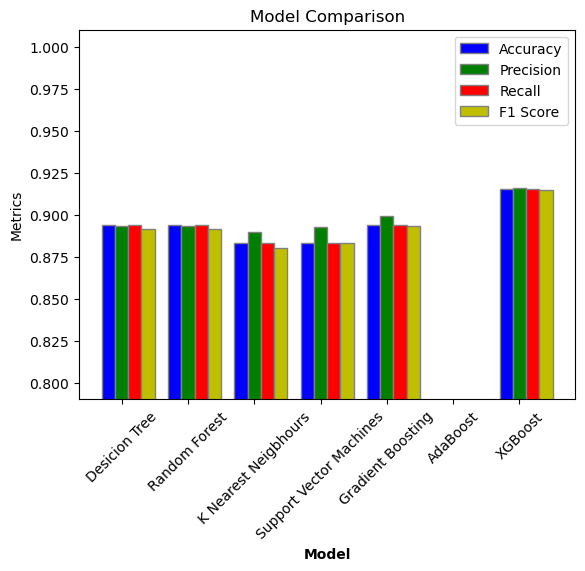

In [59]:
#ploting all the models Evaluation metrics

# Number of models
n_models = len(Model_compare['Models'])

# Setting the positions and width for the bars
bar_width = 0.2
r1 = np.arange(n_models)
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plotting the bars
plt.bar(r1, Model_compare['Accuracy'], color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, Model_compare['Precision'], color='g', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, Model_compare['Recall'], color='r', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, Model_compare['F1_score'], color = 'y', width=bar_width, edgecolor = 'grey', label = 'F1 Score')

# Adding the xticks
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + bar_width for r in range(n_models)], Model_compare['Models'])

# Adding labels and title
plt.ylabel('Metrics')
plt.title('Model Comparison')
plt.legend()
plt.xticks(rotation=45)

# Set y-axis limits
plt.ylim(0.79, 1.01)

# Show the plot
plt.show()

### Dump the model as Joblib file

In [1]:
from joblib import dump
dump(model_xgb, 'XGBoost.joblib')

NameError: name 'model_xgb' is not defined